# Challenge 5

## Reading Materials

### Required Reading


## Activity 1
Due: November 8, 2018

In Activity 1, you are tasked with building a binary classifier based on SVM.
Each student has their own files, and should work in place.
```python
student_identity = 'netid'
training = '5challenge_training_' + student_identity + '.csv'
testing = '5challenge_testing_' + student_identity + '.csv'
```

### Data

The data is generated synthetically, one set for every student, using ```sklearn.datasets.make_classification```.


### Evaluation

Submissions will be scored according to Categorization Accuracy.
This Kaggle Metric requires the following columns: Id (String) and Category (String).
The solution file should be in a CSV format.


### File Descriptions

 * `5challenge_training_netid.csv` – the training data
 * `5challenge_testing_netid.csv` – the test data
 

### Deliverables

User submissions are evaluated by comparing their submission CSV to the ground truth solution CSV with respect to Categorization Accuracy.
Documents to be submitted are as follows.

__GitHub__: Every student should commit and push files.
 1. A pediction file; Fill column ```Class``` in the testing file.
     * `ECEN689-Fall2018 -> Challenges -> 5Files -> 5challenge_testing_netid.csv`
 2. Jupyter notebook code or Python code within your own directory.
 3. Describe the Kernel you used for your SVM. Plot the decision region juxtaposed with the training set.
     * `ECEN689-Fall2018 -> Students -> GitHubID -> 5challenge_testing_netid.csv`


   Unnamed: 0  Class  Feature 0  Feature 1
0           0      1  -0.667721  -0.728348
1           1      0  -0.208228  -0.322898
2           2      1  -0.287542   1.289979
3           3      1   0.260027   1.285837
4           4      1  -0.300645   1.085727


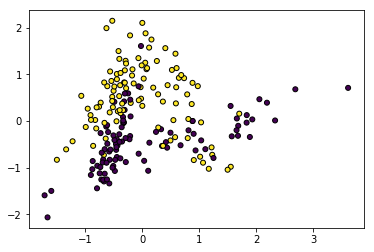

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

student_identity = 'priyab272'

filenameToRead = '5challenge_training_' + student_identity + '.csv'
training_df = pd.read_csv('5Files/' + filenameToRead)

print(training_df.head())

X1 = training_df[['Feature 0', 'Feature 1']].values
Y1 = training_df[['Class']].values
Y1 = Y1.reshape(200,);
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()


In [178]:
from sklearn import svm
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.1, random_state=42)

clf = svm.SVC(kernel='rbf', C=1.8, gamma='auto')
clf.fit(X_train,y_train)

SVC(C=1.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [179]:
clf.score(X_test, y_test, sample_weight=None)

0.94999999999999996

In [180]:
student_identity = 'priyab272'

filenameToRead = '5challenge_testing_' + student_identity + '.csv'
testing_df = pd.read_csv('5Files/' + filenameToRead)

In [181]:
X2 = testing_df[['Feature 0', 'Feature 1']].values
#Y2 = training_df[['Class']].values

In [182]:
clf.fit(X1, Y1)
Y2 = clf.predict(X2).reshape(200,)

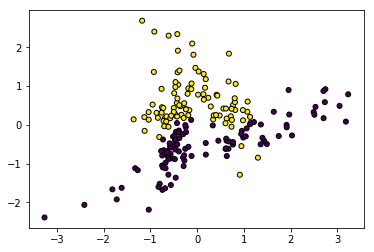

In [183]:
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')
plt.show()


In [184]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y2, s=25, edgecolor='k')
plt.xticks(())
plt.yticks(())
plt.axis('tight')

(-3.0, 3.9856381726443297, -3.0, 3.0)

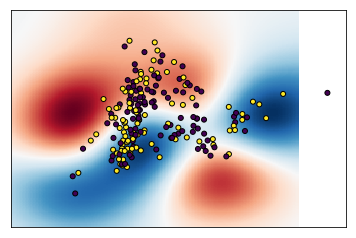

In [185]:
plt.show()

In [155]:
testing_df[['Class']] = Y2

In [172]:
testing_df.iloc[:,1:].to_csv('5Files/' + filenameToRead)